0  :  [62.41579168]
1  :  [41.41450315]
2  :  [34.87611766]
3  :  [29.28387785]
4  :  [25.65099991]
5  :  [22.97574857]
6  :  [19.76713712]
7  :  [16.46431639]
8  :  [15.27253896]
9  :  [13.87171513]
10  :  [13.58719902]
11  :  [12.99156489]
12  :  [11.21880816]
13  :  [9.42351962]
14  :  [9.39998361]
15  :  [8.70619138]
16  :  [8.55681201]
17  :  [8.49136338]
18  :  [8.55179501]
19  :  [8.07427428]
20  :  [8.05974693]
21  :  [8.13795868]
22  :  [7.89693635]
23  :  [7.49582902]
24  :  [7.07139199]
25  :  [6.48372217]
26  :  [6.21610668]
27  :  [5.84029219]
28  :  [5.7113752]
29  :  [5.83285718]
30  :  [5.63787948]
31  :  [5.35954841]
32  :  [5.42131624]
33  :  [4.90796721]
34  :  [4.28762974]
35  :  [4.27730108]
36  :  [3.88020092]
37  :  [3.72348182]
38  :  [3.75571828]
39  :  [3.59128527]
40  :  [3.56526319]
41  :  [3.69835991]
42  :  [3.40570721]
43  :  [3.4073337]
44  :  [3.623807]
45  :  [3.644751]
46  :  [3.43468285]
47  :  [3.43450103]
48  :  [3.34470742]
49  :  [3.19269069]
50 

397  :  [2.63629596]
398  :  [2.58378582]
399  :  [2.7928144]
400  :  [3.01986117]
401  :  [2.916254]
402  :  [3.03339305]
403  :  [2.91204736]
404  :  [2.84801397]
405  :  [3.1488937]
406  :  [2.87388278]
407  :  [2.87753635]
408  :  [2.63400934]
409  :  [2.48841272]
410  :  [2.57412399]
411  :  [2.70420391]
412  :  [2.64245123]
413  :  [2.53597821]
414  :  [2.40408076]
415  :  [2.45492714]
416  :  [2.8103694]
417  :  [2.77422794]
418  :  [2.82037938]
419  :  [2.57069055]
420  :  [2.65027813]
421  :  [2.68939746]
422  :  [2.54995147]
423  :  [2.37215331]
424  :  [2.48011923]
425  :  [2.32424453]
426  :  [2.37692628]
427  :  [2.36023652]
428  :  [2.5229478]
429  :  [2.43263629]
430  :  [2.3335591]
431  :  [2.43952922]
432  :  [2.3075907]
433  :  [2.19138943]
434  :  [2.54051043]
435  :  [2.60282882]
436  :  [2.58981267]
437  :  [2.43637871]
438  :  [2.25221253]
439  :  [2.36046524]
440  :  [2.26126326]
441  :  [2.16693519]
442  :  [2.25520821]
443  :  [2.29274864]
444  :  [2.38317448]


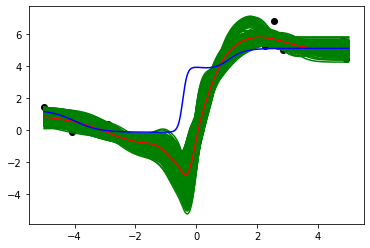

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import sys

# Parameters for NN
dataAreaMax = 5.0
dataAreaMin = -5.0

trainDataNum = 16
trainSigmaW2 = 9.0
trainSigmaY2 = 1.0
trainHiddenLayerNum = 5

learningSigmaW2 = 9.0
learningSigmaY2 = 0.25
learningHiddenLayerNum = 8

prevError = sys.float_info.max

# Parameters for HMC
learningNum = 300
sampleNum = 300
epsilon = 0.002
epsilonU = epsilon
epsilonP = epsilon
#epsilonU = 0.0002
#epsilonP = 0.0003
L = 30

# Function for NN
def tanh(x):
    return (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))

class NN:
    def __init__(self, wh1, wh2):
        self.wh1 = wh1
        self.wh2 = wh2

    def setX(self, x):
        self.z0 = np.array([x, 1])
        self.a1 = self.z0.dot(self.wh1.T)
        hiddenTmp = tanh(self.a1)
        self.z1 = np.append(hiddenTmp, 1.0)
        self.a2 = self.wh2.dot(self.z1)
    
    def updateWeight(self, wh1, wh2):
        self.wh1 = wh1
        self.wh2 = wh2


    def getZ0data(self):
        return self.z0
    
    def getA1data(self):
        return self.a1
    
    def getZ1data(self):
        return self.z1
    
    def getA2data(self):
        return self.a2
    
    def getDA(self):
        dA2 = self.z1
        dA1 = np.outer(self.wh2[0:-1] * (1 - self.z1[0:-1]**2), self.z0)
        return np.concatenate([dA2, np.concatenate(dA1)])

fig = plt.figure()

# Create train data
# Select weights
trainWh1 = []
for i in range(trainHiddenLayerNum):
    trainWh1.append(np.random.normal(loc = 0, scale = np.sqrt(trainSigmaW2), size = 2))
trainWh1 = np.array(trainWh1)
trainWh2 = np.random.normal(loc = 0, scale = np.sqrt(trainSigmaW2), size = trainHiddenLayerNum + 1)
#print(trainWh1)

# Select x data
trainXs = np.random.rand(trainDataNum) * (dataAreaMax - dataAreaMin) + dataAreaMin
#print(trainXs)

# Create y data
trainNN = NN(trainWh1, trainWh2)
trainYs = []
for x in trainXs:
    trainNN.setX(x)
    trainYs.append(trainNN.getA2data() + np.random.normal(loc = 0.0, scale = np.sqrt(trainSigmaY2), size = 1))

# Create a line
originalXs = np.linspace(dataAreaMin, dataAreaMax, 1000)
originalYs = []
for x in originalXs:
    trainNN.setX(x)    
    originalYs.append(trainNN.getA2data())
    
#Learing
#initialize data
learningWh1 = []
for i in range(learningHiddenLayerNum):
    learningWh1.append(np.random.normal(loc = 0, scale = np.sqrt(learningSigmaW2), size = 2))
learningWh1 = np.array(learningWh1)
learningWh2 = np.random.normal(loc = 0, scale = np.sqrt(learningSigmaW2), size = learningHiddenLayerNum + 1)

learningNN = NN(learningWh1, learningWh2)

sampledYs = []

# back propagation
for i in range(sampleNum + learningNum):
    ew = 0.0
    rejectedFlag = True
    
    # HMC
    while rejectedFlag:
        uInit = 0.0

        # Step 1 : Sample p.
        p1 = []
        for k in range(learningHiddenLayerNum):
            p1.append(np.random.normal(loc = 0, scale = 1.0, size = 2))
        p1 = np.array(p1)
        p2 = np.random.normal(loc = 0, scale = 1.0, size = learningHiddenLayerNum + 1)
        p1Init = np.ravel(p1)
        p2Init = np.array(p2)

        # Step 2 : calculate z* with leapfrog method
        tmpW1 = np.array(learningWh1)
        tmpW2 = np.array(learningWh2)
            
        for j in range(L):
            ew = 0.0
            dEw2 = np.zeros([1, learningHiddenLayerNum + 1])[0]
            dEw1 = np.zeros([learningHiddenLayerNum, 2])
            learningNN.updateWeight(tmpW1, tmpW2)

            for x, y in zip(trainXs, trainYs):
                learningNN.setX(x)
                delta2 = learningNN.getA2data() - y
                delta1 = delta2 * tmpW2[0:-1] * (1 - learningNN.getZ1data()[0:-1]**2)
                dEw2 += delta2 * learningNN.getZ1data()
                dEw1 += np.outer(delta1, learningNN.getZ0data())
                ew += 0.5 * delta2**2
            
            #U = (1/learningSigmaY2) * ew + (1/learningSigmaW2) * (learningWh1.dot(learningWh1) + learningWh2.dot(learningWh1))
            dU1 = (1/learningSigmaY2) * dEw1 + (1/learningSigmaW2) * tmpW1
            dU2 = (1/learningSigmaY2) * dEw2 + (1/learningSigmaW2) * tmpW2
            
            if j == 0:
                tmpW1tmp = np.ravel(tmpW1)
                uInit = (1/learningSigmaY2) * ew + (1/learningSigmaW2) * (tmpW1tmp.dot(tmpW1tmp) + tmpW2.dot(tmpW2))
            if j == L - 1:
                tmpW1tmp = np.ravel(tmpW1)
                U = (1/learningSigmaY2) * ew + (1/learningSigmaW2) * (tmpW1tmp.dot(tmpW1tmp) + tmpW2.dot(tmpW2))
            
#            print(p1)
#            print(dU1)
#            print(p2)
#            print(dU2)
            
            p1 = p1 - epsilonU / 2 * dU1
            p2 = p2 - epsilonU / 2 * dU2
            
            tmpW1 = tmpW1 + epsilonP * p1
            tmpW2 = tmpW2 + epsilonP * p2
            p1 = p1 - epsilonU / 2 * dU1
            p2 = p2 - epsilonU / 2 * dU2
            
        # Step 3 : Calculate log(r)
        p1tmp = np.ravel(p1)
        logR = U - uInit + (p1tmp.dot(p1tmp) + p2.dot(p2)) - (p1Init.dot(p1Init) + p2Init.dot(p2Init))
    
        # Step 4 : Update z (sample)
        threshold = np.random.rand()
        if np.exp(min(0, logR)) >= threshold:
            # Accepted
            learningWh1 = tmpW1
            learningWh2 = tmpW2
                
            rejectedFlag = False
    
    if i >= learningNum:
        tmpYs = []
        for x in originalXs:
            learningNN.setX(x)
            tmpYs.append(learningNN.getA2data())
        sampledYs.append(tmpYs)
    
    print(i, " : ", ew)

sampledYsT = np.array(sampledYs).T
mapYs = []
for ys in sampledYsT:
    mapYs.append(np.sum(ys) / len(ys))

ax = fig.add_subplot(1, 1, 1)
for ys in sampledYs:
    plt.plot(originalXs, ys, color = "green")
plt.plot(originalXs, mapYs, color = "red")
plt.scatter(trainXs, trainYs, color = "black")
plt.plot(originalXs, originalYs, color = "blue")

plt.show()